# <font color='blue'>NIFTY BANK 📈Visualization and Forecasting using Time Series</font>
![](niftybanks.jpg)

* [__Introduction to Data__](#1)
* [Import Libraries and Data Input](#2)
* [Data Cleaning](#3)
* [Visualizing the datasets](#4)
    * [Nifty 50 Close Price Visulization](#5)
    * [Nifty BANK Close Price Visulization](#6)
* [Comparing time series](#7)
* [The augmented Dicky-Fuller test](#8)
* [Making a time series stationary](#9)
    * [Difference Δyt = yt − yt−1](#10)
    * [proportional change](#11)
* [Window functions](#12)
* [Financial Charts](#13)
    * [OHLC chart](#14)
    * [Candlestick chart](#15)
* [Time series decomposition](#16)
* [Autocorrelation and Partial Autocorrelation](#17)
* [Using ACF and PACF to choose model order](#18)
* [SARIMAXA Model](#19)
* [SARIMAXA Model diagnostics](#20)
* [Prediction on train data](#21)
* [Forecasting on train data](#22)
* [Plot Prediction and Forcasting](#23)

## Import Libraries and Data Input<a id='2'></a>

In [125]:
import numpy as np 
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [126]:
nifty_50_df = pd.read_csv("NIFTY 50.csv", index_col='Date', parse_dates=['Date'])
nifty_bank_df = pd.read_csv("NIFTY BANK.csv", index_col='Date', parse_dates=['Date'])

nifty_50_df.head(5)

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322.0,8.841500e+09,25.91,4.63,0.95
2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872.0,1.973690e+10,26.67,4.76,0.92
2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431.0,3.084790e+10,25.97,4.64,0.95
2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875.0,2.531180e+10,26.32,4.70,0.94
2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945.0,1.914630e+10,26.25,4.69,0.94


In [127]:
nifty_50_df.tail(5)

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2020-07-21,11126.10,11179.55,11113.25,11162.25,771998838.0,4.246189e+11,29.01,3.18,1.44
2020-07-22,11231.20,11238.10,11056.55,11132.60,765074288.0,4.106872e+11,28.93,3.17,1.44
2020-07-23,11135.00,11239.80,11103.15,11215.45,621575333.0,3.274493e+11,29.20,3.20,1.43
2020-07-24,11149.95,11225.40,11090.30,11194.15,678935175.0,4.021717e+11,29.35,3.19,1.43
2020-07-27,11225.00,11225.00,11087.85,11131.80,NaN,NaN,29.18,3.17,1.44


* <font color='red'>P/E</font>: The basic definition of a P/E ratio is stock price divided by <font color='Blue'>earnings per share</font> (EPS).
* <font color='red'>P/B</font>: The P/B ratio compares a company's market capitalization, or market value, to its <font color='Blue'>book value</font>.
* <font color='red'>Dividend yield</font> is the financial ratio that measures the quantum of cash dividends paid out to shareholders relative to the market value per share. It is computed by dividing the dividend per share by the market price per share and multiplying the result by 100.

## Data Cleaning<a id='3'></a>

* <font color='red'>nifty_50_df</font> have data does have missing values. It is cleaned using <font color='red'>fillna()</font> method with ffill parameter which propagates last valid observation to fill gaps

In [128]:
nifty_50_df = nifty_50_df.fillna(method='ffill')
nifty_bank_df = nifty_bank_df.fillna(method='ffill')

## Visualizing the datasets<a id='4'></a>

In [129]:
def plot_attribute(df, attritube ,start='2000', end='2020',color ='blue'):
    fig, ax = plt.subplots(1, figsize=(20,5))
    ax.plot(df[start:end].index, df[start:end][attritube],'tab:{}'.format(color))
    ax.set_title("Nifty stock {} from 2000 to 2020".format(attritube))
    
    ax.axhline(y=df[start:end].describe()[attritube]["max"],linewidth=2, color='m')
    ax.axhline(y=df[start:end].describe()[attritube]["min"],linewidth=2, color='c')
    ax.axvline(x=df[attritube].idxmax(),linewidth=2, color='b')
    ax.axvline(x=df[attritube].idxmin() ,linewidth=2, color='y')
    
    ax.text(x=df[attritube].idxmax(),
            y=df[start:end].describe()[attritube]["max"],
            s='MAX',
            horizontalalignment='right',
            verticalalignment='bottom',
            color='blue',
            fontsize=20)
    
    ax.text(x=df[attritube].idxmin(),
            y=df[start:end].describe()[attritube]["min"],
            s='MIN',
            horizontalalignment='left',
            verticalalignment='top',
            color='red',
            fontsize=20)
    
    plt.show()
    print("Max Value :  ",df[start:end].describe()[attritube]["max"])
    print("Min Value :  ",df[start:end].describe()[attritube]["min"])


### Nifty Bank Close Price Visulization<a id='5'></a>

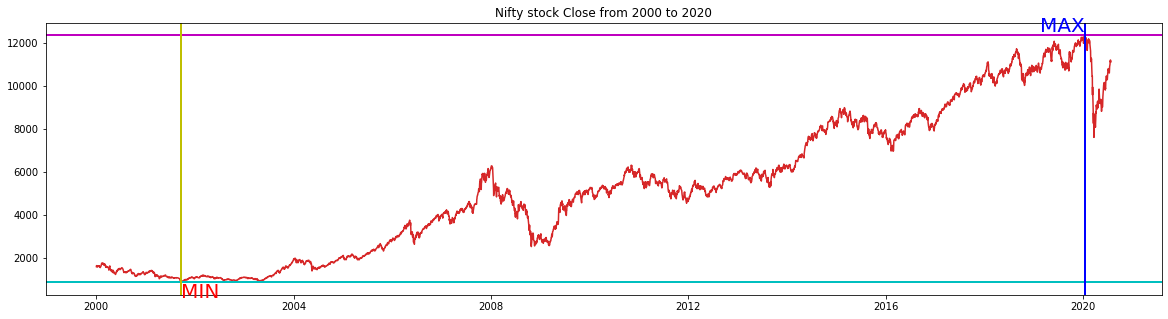

Max Value :   12362.3
Min Value :   854.2


In [130]:
plot_attribute(nifty_50_df,"Close",color='red')

### Nifty BANK Close Price Visulization<a id='6'></a>

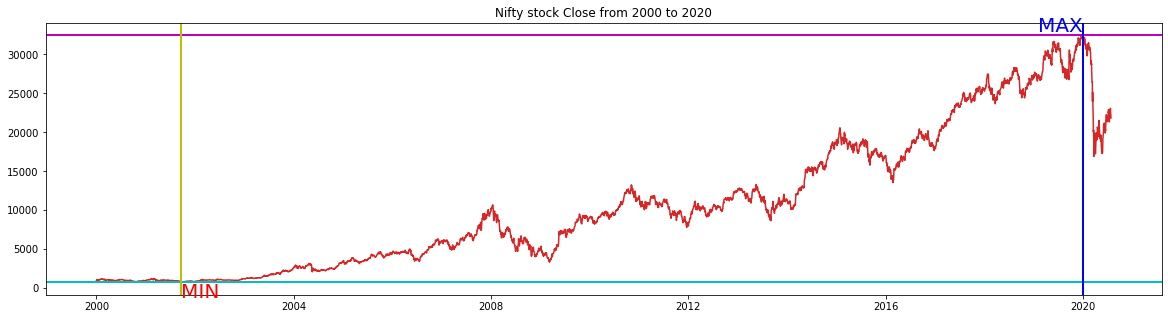

Max Value :   32443.85
Min Value :   743.7


In [131]:
plot_attribute(nifty_bank_df,"Close",color='red')

## Comparing Time Series<a id='7'></a>
We will compare time series by normalizing them. This is achieved by dividing each time series element of all time series by the first element. This way both series start at the same point and can be easily compared.

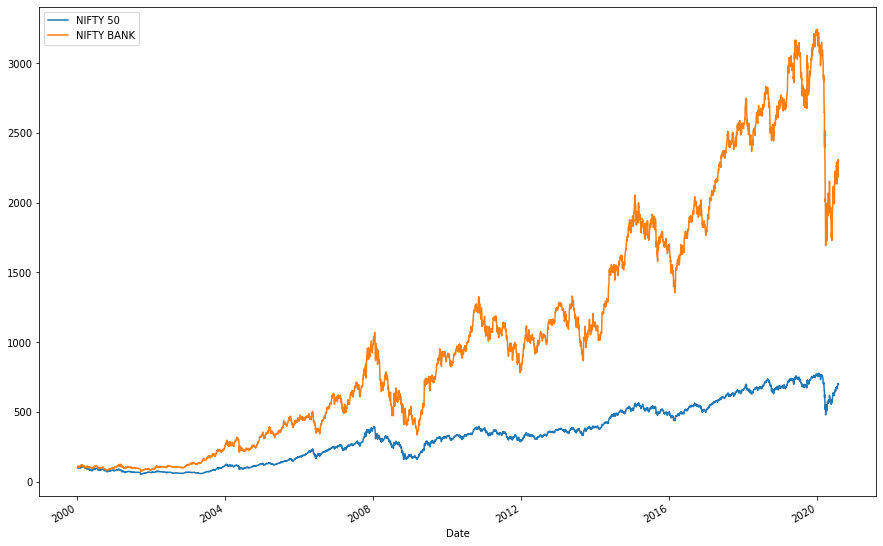

In [132]:
normalised_nifty_50_df = nifty_50_df["Close"].div(nifty_50_df["Close"].iloc[0]).mul(100)
normalised_nifty_bank_df = nifty_bank_df["Close"].div(nifty_bank_df['Close'].iloc[0]).mul(100)
normalised_nifty_50_df.plot()
normalised_nifty_bank_df.plot()
plt.legend(['NIFTY 50','NIFTY BANK'])
plt.show()

## The Augmented Dicky-Fuller test<a id='8'></a>
* Tests for trend non-stationarity 
* Null hypothesis is time series is non-stationary

In [133]:
dicky_fuller_result = adfuller(nifty_bank_df['Close'])
dicky_fuller_result

(-0.8907415995556845,
 0.7910060494298842,
 14,
 5102,
 {'1%': -3.431632358513106,
  '5%': -2.862106666289463,
  '10%': -2.567071636724501},
 68553.22109969948)

* 0th element is test statistic (-0.7655677955763277) 
> More negative means more likely to be stationary 
* 1st element is p-value: (0.8290276704492101) 
> 1. If p-value is small then 0.05→reject null hypothesis. Reject non-stationary.
> 2. which is more than 0.05 null hypothesis is True and this is a random walk.¶
* 4th element is the criticaltest statistics


## **Making a time series stationary**<a id='9'></a>
* Taking the difference
> Difference: Δyt = yt − yt−1
* Take the log 
> np.log(df) 
* Take the square root 
> np.sqrt(df) 
* Take the proportional change 
> df.shift(1)/df

### Difference Δyt = yt − yt−1<a id='10'></a>

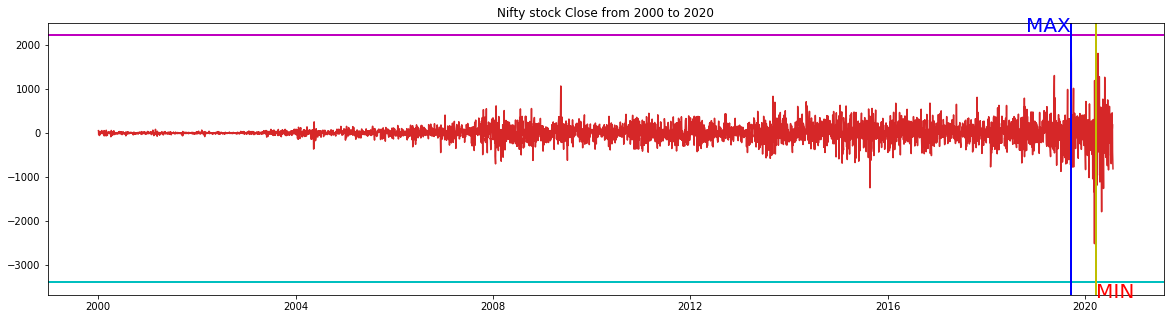

Max Value :   2223.899999999998
Min Value :   -3399.949999999997


In [134]:
plot_attribute(nifty_bank_df.diff(),"Close",color='red')

* difference 1 is a stationary series, here we can't see trend
* Trend stationary: Trend is zero
* Variance is constant

### Proportional Change <a id='11'></a>

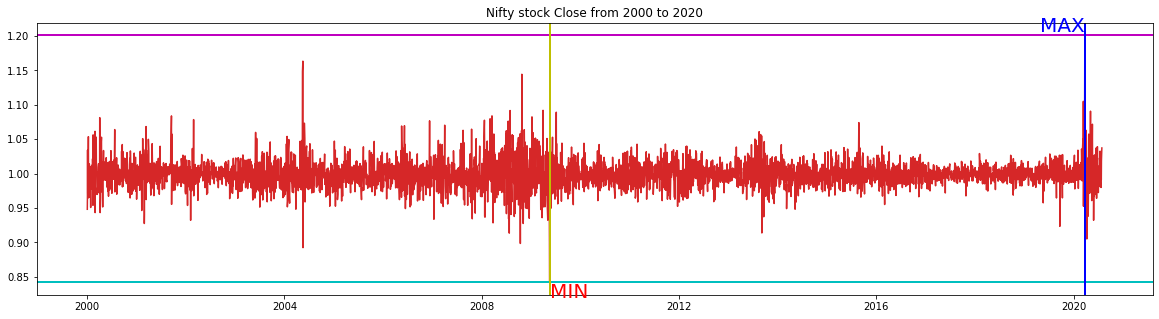

Max Value :   1.2009705839759066
Min Value :   0.8416475160901788


In [135]:
plot_attribute(nifty_bank_df.shift(1)/nifty_bank_df,"Close",color='red')

* Proportional change of nifty_50 data makes not series a stationary series ... we can see a stable trend

## Window functions<a id='12'></a>
* Window functions are used to identify sub periods, calculates sub-metrics of sub-periods.
1. **Rolling** - Same size and sliding
2. **Expanding** - Contains all prior values

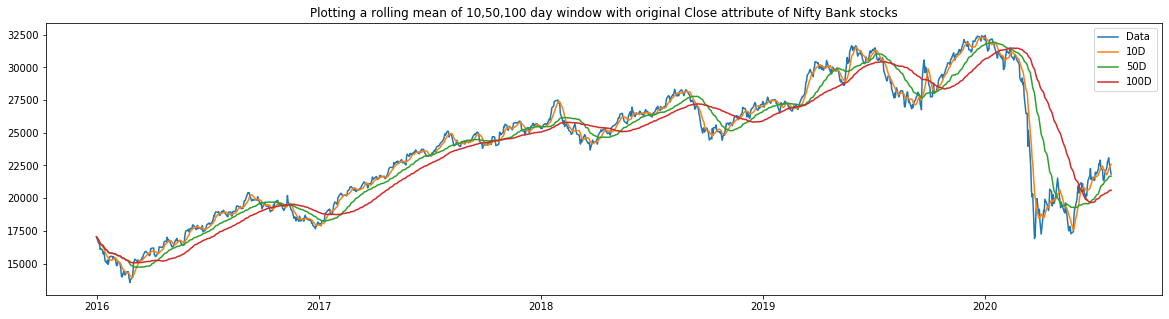

In [136]:
some_part_of_data = nifty_bank_df['2016':'2020']

rolling_nifty_bank_df_10 = some_part_of_data['Close'].rolling('10D').mean()
rolling_nifty_bank_df_50 = some_part_of_data['Close'].rolling('50D').mean()
rolling_nifty_bank_df_100 = some_part_of_data['Close'].rolling('100D').mean()

fig, ax = plt.subplots(1, figsize=(20,5))
ax.plot(some_part_of_data.index,some_part_of_data['Close'])
ax.plot(rolling_nifty_bank_df_10.index, rolling_nifty_bank_df_10)
ax.plot(rolling_nifty_bank_df_50.index, rolling_nifty_bank_df_50)
ax.plot(rolling_nifty_bank_df_100.index, rolling_nifty_bank_df_100)
ax.set_title("Plotting a rolling mean of 10,50,100 day window with original Close attribute of Nifty Bank stocks")
plt.legend(['Data','10D','50D','100D'])
plt.show()

# Financial Charts<a id='13'></a>

## OHLC chart<a id='14'></a>

The [OHLC](https://plotly.com/python/ohlc-charts/) chart (for open, high, low and close) is a style of financial chart describing open, high, low and close values for a given x coordinate (most likely time). The tip of the lines represent the low and high values and the horizontal segments represent the open and close values. Sample points where the close value is higher (lower) then the open value are called increasing (decreasing). By default, increasing items are drawn in green whereas decreasing are drawn in red.

In [137]:
# Obtain data from the data frame
OHLC_data = nifty_bank_df['3-2020':'2020']

fig = go.Figure(data=go.Ohlc(x=OHLC_data.index,
                            open=OHLC_data['Open'],
                            high=OHLC_data['High'],
                            low=OHLC_data['Low'],
                            close=OHLC_data['Close']))

fig.update_layout(title_text='Nifty Bank From March 2020 to May 2020',
                  title={
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                  xaxis_rangeslider_visible=True, 
                  xaxis_title="Time", 
                  yaxis_title="Price")

fig.show()

## Candlestick chart<a id='15'></a>

The [candlestick chart](https://plotly.com/python/candlestick-charts/) is a style of financial chart describing open, high, low and close for a given x coordinate (most likely time). The boxes represent the spread between the open and close values and the lines represent the spread between the low and high values. Sample points where the close value is higher (lower) then the open value are called increasing (decreasing). By default, increasing candles are drawn in green whereas decreasing are drawn in red.

In [138]:
Candlestick_data = nifty_bank_df['3-2020':'2020']

fig = go.Figure(data=go.Candlestick(x=Candlestick_data.index,
                            open=Candlestick_data['Open'],
                            high=Candlestick_data['High'],
                            low=Candlestick_data['Low'],
                            close=Candlestick_data['Close']))

fig.update_layout(title_text='Nifty Bank From March 2020 to May 2020',
                  title={
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                  xaxis_rangeslider_visible=True, 
                  xaxis_title="Time", 
                  yaxis_title="Price")

fig.show()

# Time series decomposition<a id='16'></a>

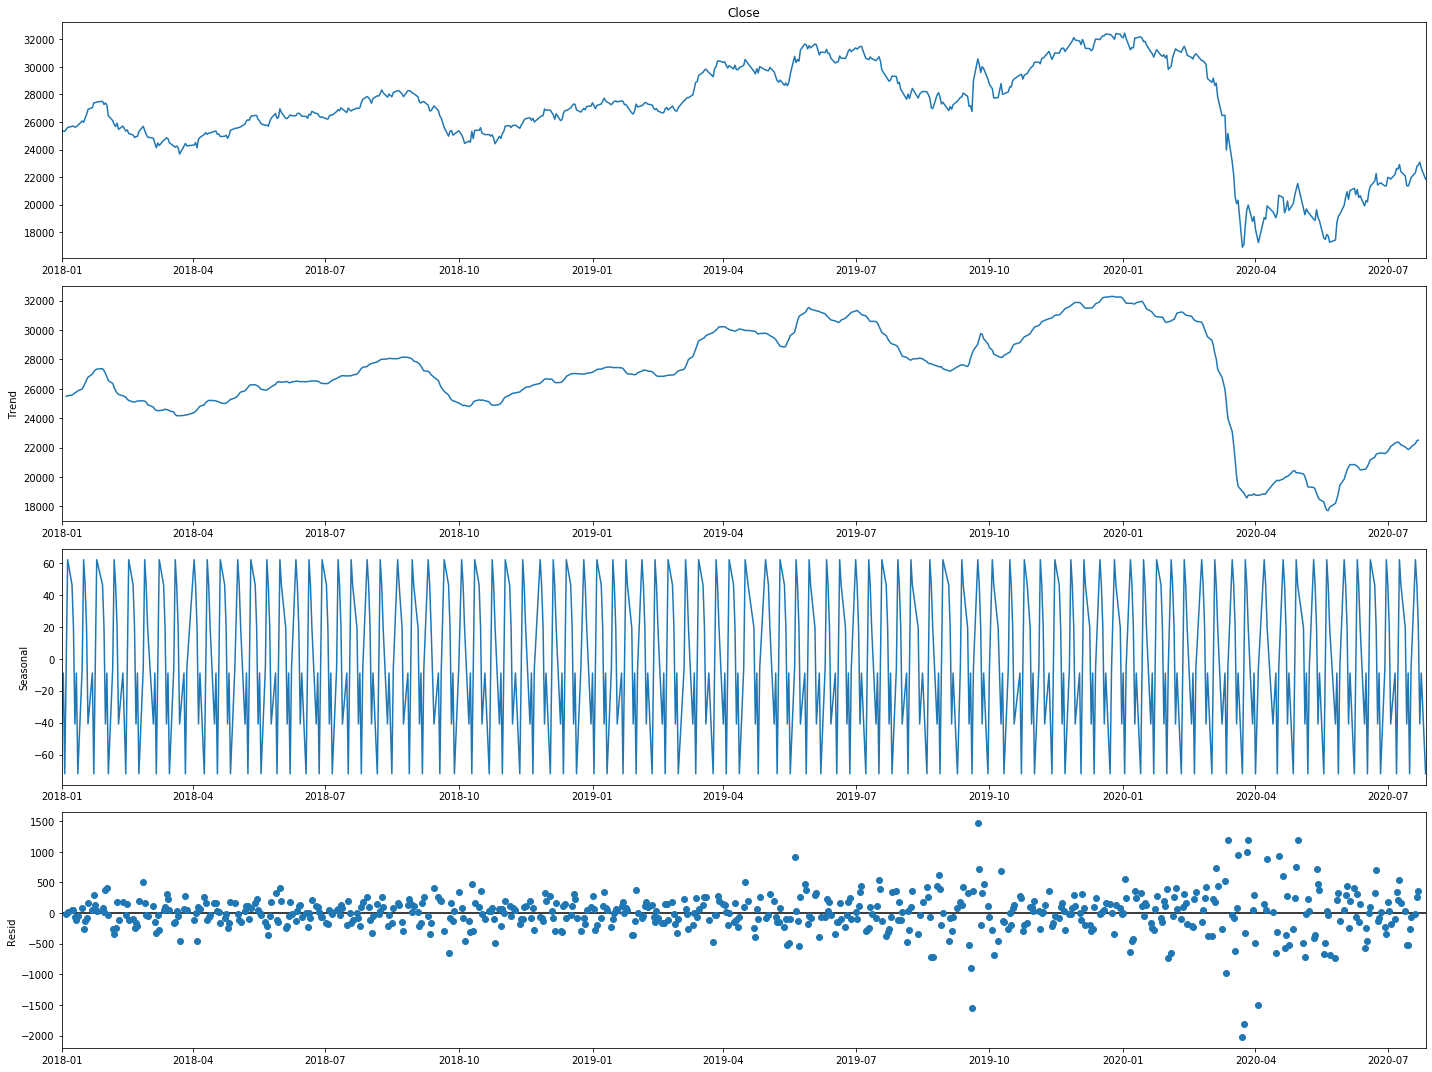

In [139]:
decomposition_data = nifty_bank_df['2018':'2020']
decomp_results = seasonal_decompose(decomposition_data['Close'], freq=7)
plt.rcParams["figure.figsize"] = (20,15)
figure = decomp_results.plot()

plt.show()

* There is an upward trend at first after there is downward trend.
* Also, we can see there is uniform seasonal change
* Non-uniform noise that represent outliers

# Autocorrelation and Partial Autocorrelation<a id='17'></a>

* **ACF (autocorrelation)** is the linear correlation of a signal with itself at two different points in time, ACF (autocorrelation function) is just such correlation as a function of the lag h between two points of time.

* **PACF (partial autocorrelation function)** is essentially the autocorrelation of a signal with itself at different points in time, with linear dependency with that signal at shorter lags removed, as a function of lag between points of time. Informally, the partial correlation between x(t) and x(t+h) is the autocorrelation between x(t) and x(t+h) without the contribution of x(t+1),x(t+2),....,x(t+h−1).

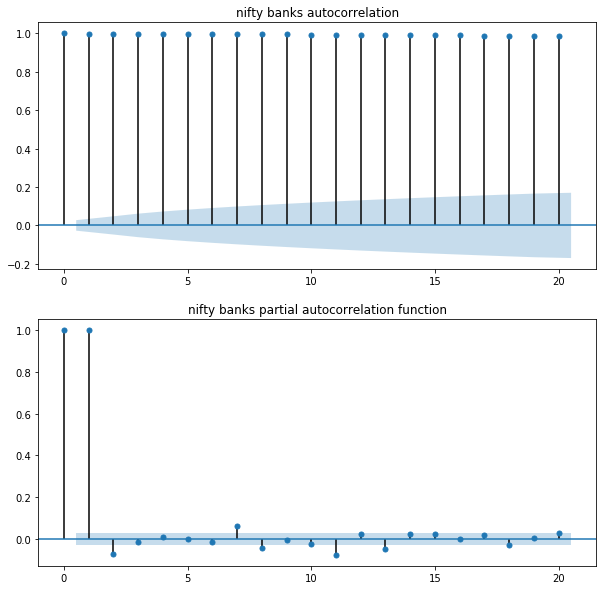

In [140]:
plt.figure(figsize=(10,10))

# ACF of Nifty bank close price
ax1 = plt.subplot(211)
plot_acf(nifty_bank_df["Close"], lags="20",title="nifty banks autocorrelation",ax=ax1)

# PACF of Nifty bank close price
ax2 = plt.subplot(212)
plot_pacf(nifty_bank_df["Close"], lags="20",title="nifty banks partial autocorrelation function",ax=ax2)

plt.show()

* **In ACF** As all lags are either close to 1 or at least greater than the confidence interval, they are statistically significant.
* ** IN PCF** it is statistically signficant, partial autocorrelation after first 2 lags is very low.
* Here, only 0th, 1st, 6th, 7th, 11th and 12th lag are statistically significant.

## Using ACF and PACF to choose model order<a id='18'></a>
| INDEX | AR(P) | MA(Q) | ARMA(P,Q) |
| --- | --- | --- | --- |
| ACF  | Tail off | Cuts off after lag q | Tails off |
| PACF  | Cuts off afterlag P | Tails off | Tails off |

## AIC(Akaike information criterion) And BIC (Bayesian information criterion)
 1.  **AIC**   
     * Lower AIC indicate batter model
     * AIC choose simple models with lower order
 2.  **BIC** 
     * Lower BIC indicate batter model
     * BIC favoures simple model then AIC
     * AIC is better at choosing predictive models 
     * BIC is better at choosing good explanatory model


In [141]:
train_data = nifty_bank_df["Close"]["2018":"4-15-2020"]
test_data  = nifty_bank_df["Close"]["4-15-2020":]

In [142]:
order_aic_bic =[] 
# Loop over AR order 
for p in range(6): 
    # Loop over MA order 
    for q in range(3): 
        # Fit model 
        for d in range(2):
            model = SARIMAX(train_data, order=(p,d,q),initialization='approximate_diffuse') 
            results = model.fit() 
            # Add order and scores to list 
            order_aic_bic.append((p,d, q, results.aic, results.bic))            

* we will choose lower aic value model

In [143]:
order_df = pd.DataFrame(order_aic_bic, columns=['p','d','q', 'aic', 'bic'])
#short value by aic and get value of p d q
order_df.sort_values('aic')[:5]

,p,d,q,aic,bic
1,0,1,0,8684.717975,8689.049477
7,1,1,0,8686.706072,8695.369076
3,0,1,1,8688.643188,8697.306192
13,2,1,0,8689.772798,8702.767304
5,0,1,2,8690.122427,8703.116932


* so we will choose P = 5 , d = 1 , q = 2

## SARIMAXA Model<a id='19'></a>

In [144]:
model = SARIMAX(train_data, order=(5,1,2)) 
results = model.fit()

In [145]:
mae = np.mean(np.abs(results.resid))
print(mae)

312.77434109605963


* How far our the predictions from the real values?

## Model diagnostics<a id='20'></a>

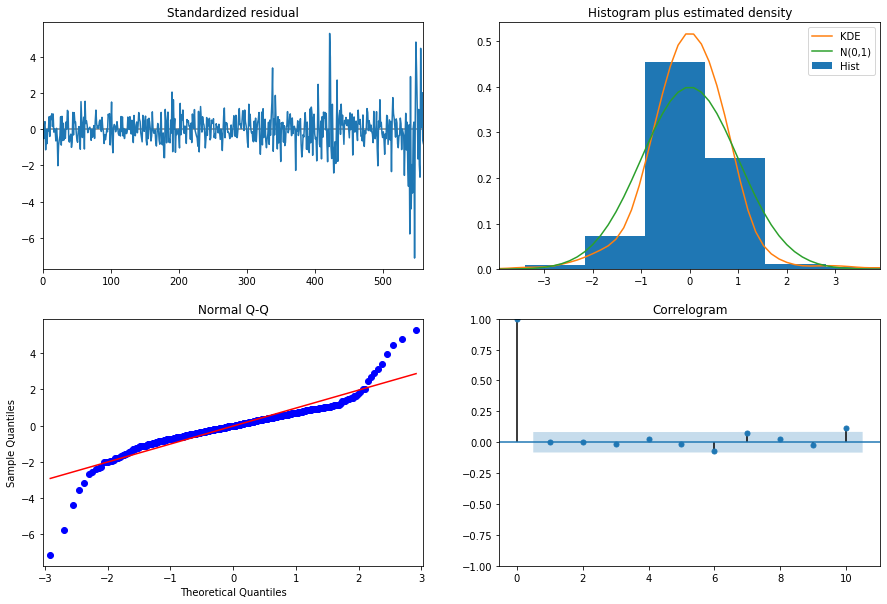

In [146]:
plt.rcParams["figure.figsize"] = (15,10)
results.plot_diagnostics() 
plt.show()

* If the model fits well the residuals will be white Gaussian noise
* Histogram & KDE should be normally distributed
* Noraml Q-Q points should be almost on red line
* Correlogram of residuals should be zero for all legs

## Prediction on train data<a id='21'></a>

In [147]:
#prediction = results.get_prediction(start=pd.to_datetime('2019-07').to_pydatetime())
prediction = results.get_prediction(start="7-2019",end="10-2019")
#prediction = results.predict(start=2019-7-1,axis=0)

In [148]:
predictedmean = prediction.predicted_mean
p_bounds = prediction.conf_int()
p_lower_limit = p_bounds.iloc[:,0]
p_upper_limit = p_bounds.iloc[:,1]

## Forcasting on test data<a id='22'></a>

In [149]:
forecast = results.get_forecast(steps=len(test_data))

In [150]:
mean_forecast = forecast.predicted_mean
f_bounds = forecast.conf_int()
f_lower_limit = f_bounds.iloc[:,0]
f_upper_limit = f_bounds.iloc[:,1]

## Plot Prediction and Forcasting<a id='23'></a>

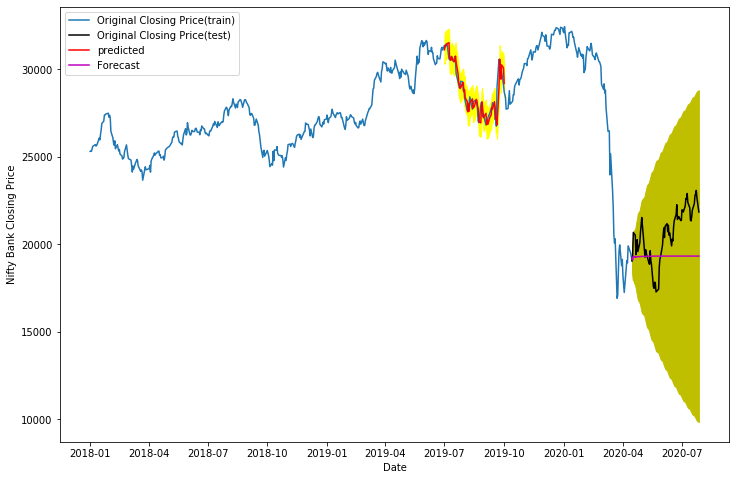

In [151]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data, label='Original Closing Price(train)')
plt.plot(test_data.index, test_data, label='Original Closing Price(test)',color='k')

plt.plot(predictedmean.index, predictedmean, color='r', label='predicted')
plt.plot(test_data.index, mean_forecast, color='m', label='Forecast')

plt.fill_between(predictedmean.index,p_lower_limit,p_upper_limit, color='yellow')
plt.fill_between(test_data.index,f_lower_limit,f_upper_limit, color='y')

plt.xlabel('Date')
plt.ylabel('Nifty Bank Closing Price')
plt.legend()
plt.show()

* Due to high volatility in 2020, in Nifty Banks price we can see high difference between upper and lower bound of forecasting
* But test data is inside the boundary.